In [ ]:
import pandas as pd
from google.colab import files
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [ ]:
uploaded = files.upload()
df = pd.read_csv('netflix.csv')
df.head()

Saving netflix.csv to netflix (2).csv


,Date,Open,High,Low,Close,Volume
0,07/09/2021,531.00,538.26,528.58,535.98,"2,777,231"
1,07/08/2021,530.93,535.50,529.09,530.76,"3,268,988"
2,07/07/2021,544.24,544.64,531.66,535.96,"2,722,498"
3,07/06/2021,533.00,542.86,533.00,541.64,"2,775,051"
4,07/02/2021,535.50,538.54,529.39,533.98,"1,980,316"


In [ ]:
df.shape


(22, 6)

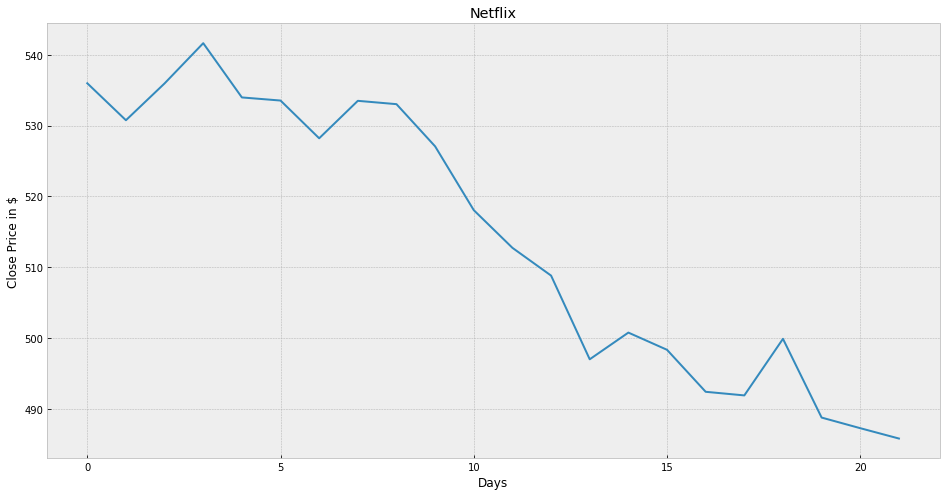

In [ ]:
#Visualize data (close price)
plt.figure(figsize=(16,8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price in $')
plt.plot(df['Close'])
plt.show()

In [ ]:
df = df[['Close']]
df.head()

,Close
0,535.98
1,530.76
2,535.96
3,541.64
4,533.98


In [ ]:
#Create a variable to predict 'x' days out into future
futur_days = 10
#Create a new column (target)
df['Prediction'] = df[['Close']].shift(-futur_days)
df.tail()

,Close,Prediction
17,491.90,NaN
18,499.89,NaN
19,488.77,NaN
20,487.27,NaN
21,485.81,NaN


In [ ]:
#Create feature(X) and convert it to a numpy array and remove the last x rows
X = np.array(df.drop(['Prediction'],1))[:-futur_days]
print(X)

[[535.98]
 [530.76]
 [535.96]
 [541.64]
 [533.98]
 [533.54]
 [528.21]
 [533.5 ]
 [533.03]
 [527.07]
 [518.06]
 [512.74]]


In [ ]:
#Create Target data (y) and convert it to np array
y=np.array(df['Prediction'])[:-futur_days]
print(y)

[518.06 512.74 508.82 497.   500.77 498.34 492.41 491.9  499.89 488.77
 487.27 485.81]


In [ ]:
#Split data into 75 training and 25 testing
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [ ]:
#Create the models (Decision tree and linear regression)
tree = DecisionTreeRegressor().fit(x_train,y_train)
lr = LinearRegression().fit(x_train,y_train)



In [ ]:
#Get the last x rows of the features
x_futur = df.drop(['Prediction'],1)[:-futur_days]
x_futur = x_futur.tail(futur_days)
x_futur = np.array(x_futur)
x_futur

array([[535.96],
       [541.64],
       [533.98],
       [533.54],
       [528.21],
       [533.5 ],
       [533.03],
       [527.07],
       [518.06],
       [512.74]])

In [ ]:
#Show the model tree prediction
tree_prediction = tree.predict(x_futur)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_futur)
print(lr_prediction)

[508.82 497.   498.34 498.34 492.41 491.9  499.89 492.41 487.27 485.81]

[501.92854159 506.14641225 500.45822752 500.13149106 496.17352441
 500.10178775 499.7527738  495.32697995 488.63630836 484.68576753]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


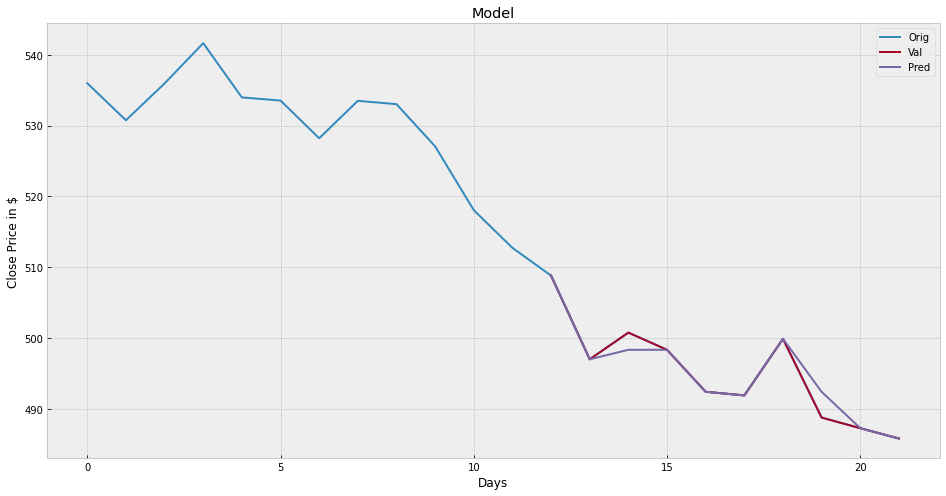

In [ ]:
#Visualize the data (Tree )
predictions = tree_prediction
valid = df[X.shape[0]:]

valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in $')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


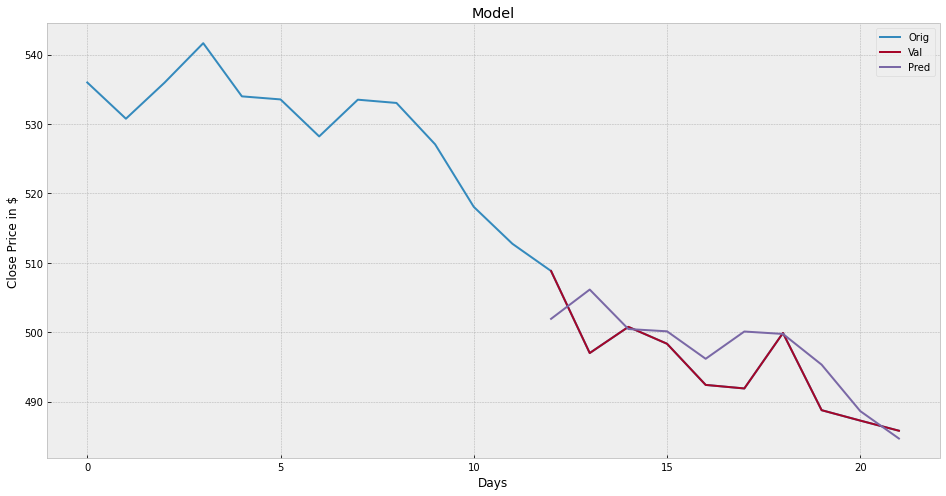

In [ ]:
#Visualize the data (Linear regression )
predictions = lr_prediction
valid = df[X.shape[0]:]

valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price in $')
plt.plot(df['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Orig','Val','Pred'])
plt.show()